# **1 - Perkenalanan**

Nama. : Josua Yerico

Batch : FTDS-001-Hck

Dataset : mentalhealth.csv

Objective : Pembuatan Chatbox untuk menjawab pertanyaan user/pasien/masyarakat tentang kesehatan mengunakan model LSTM

# **2 - Background Problem**

Chatterbot (chatbot) adalah sebuah program komputer yang dirancang untuk menyimulasikan percakapan intelektual dengan satu atau lebih manusia baik secara audio maupun teks. 

pada era digital, mayoritas masyarakat lebih banyak menghabiskan waktunya mengunakan aplikasi chat/text. selain itu, berdasarkan data (sumber: https://99firms.com/blog/generation-z-statistics/#gref), 73% dari 24 jam  waktu gen z dihabiskan untuk chattingan dan 17% dari 24 jam waktu gen z dihabiskan untuk browsing. hal tersebut mengartikan bahwa gen z lebih suka menghabiskan waktunya untuk bertanya, mengali informasi, dan memulai percakapan dengan teman daripada melalui media internet/browsing. akan tetapi informasi tentang kesehatan/penyakit dari teman dapat berpotensi salah/HOAX atau menyebabkan seseorang tersebut menjadi paranoid terhadap penyakit tertentu.

Selain itu, berita yang tidak benar/HOAX terhadap penyakit tertentu juga dapat menyebabkan seseorang menyepelekan penyakit tersebut, kemudian beranggapan bahwa penyakit tersebut tidak berbahayadan dapat disembuhkan dengan obat - obatan yang ada di warung. jika penyakit tersebut memang bisa disembuhkan oleh obat - obatan diwarung, maka seseorang tersebut akan pulih atau sembuh. terus bagaimana ketika seseorang mengonsumsi obat - obatan di warung dan membuat penyakit seseorang menjadi lebih parah atau menambah penyakit baru.

sebagai contoh Budi memiliki gejala penyakit batuk - batuk seperti penyakit flu pada umumnya selama 14 hari. kemudian Budi menanyakan ke temannya dan temannya menyarankan kepada budi untuk membiarkan batuk - batuk tersebut karena batuk tersebut akan sembuh sendiri seiring berjalan waktu. Budi pun mendengarkan temannya. setelah dua minggu kemudian, batuk - batuk budi pun makin parah dan teman budi pun tetap menyarankan budi untuk sabar karena batuk tersebut akan sembuh sendiri. temannya budi berkata demikian karena dia pernah mengalami hal yang serupa dan pada akhirnya sembuh tanpa obat. setelah sebulan kemudian, batuk - batuk pada budi pun makin parah dan membuat budi untuk periksa ke rumah sakit dan hasil nya budi diagnosis penyakit TBC akut dan  harus segera diobati. jika budi pada waktu itu langsung berobat tanpa bertanya kepada temannya, mungkin saat itu budi tidak diagnosis penyakit TBC akut.

Oleh sebab itu, PT INIPEDIA pun ingin meminimalisir hal demikian tanpa si user (gen z) kesulitan untuk mencari informasi mengenai penyakit/kesehatan.

Supaya user(gen z) bisa mendapatkan informasi yang akurat tentang kesehatan/penyakit sekaligus dapat memenuhi kebutuhan sosial dari user (gen z), PT INIPEDIA membuat suatu aplikasi chatbot dimana user dapat chattingan dengan bot dan bertanya-tanya seputar informasi kepada bot tentang ciri - ciri penyakit, gejala dari penyakit tersebut, cara mencegah supaya tidak terkena penyakit tersebut, dsb.

# **3 - Import Libaries**

In [ ]:
#Define libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#for Saving Model
import pickle

#for Data Preprocessing
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#for Model and Evaluation Model
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, LSTM 
from tensorflow.keras.models import Model, Sequential
from keras.utils.vis_utils import plot_model

# **4 - Data Loading**

Berikut dataset yang digunakan dalam pembuatan chatbot untuk menjawab semua pertanyaan dari user tentang kesehatan/penyakit. akan tetapi, dalam uji coba pembuatan chatbot tersebut digunakan dataset mental health dan covid-19. setelah model dapat menjawab semua pertanyaan tentang mental health dan covid-19, akan dilakukan perkembangan model dengan semua penyakit.

In [ ]:
data = pd.read_csv("/content/sample_data/mentalhealth.csv",encoding='latin-1')
data

,Questions,Answers
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,Who does mental illness affect?,"Mental illness does can affect anyone, regardl..."
2,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
3,Can people with mental illness recover?,"When healing from mental illness, early identi..."
4,What should I do if I know someone who appears...,We encourage those with symptoms to talk to th...
...,...,...
177,Are smokers and tobacco users at higher risk o...,Smokers are likely to be more vulnerable to CO...
178,Are smokers and tobacco users at higher risk o...,Smoking products such as water pipes often inv...
179,How large does a meeting or event need to be i...,High profile international sporting events suc...
180,How large does a meeting or event need to be i...,An event counts as a mass gatherings if the ...


Berikut dataset mental health yang digunakan dalam pembuatan chatbot:

In [ ]:
data.head()

,Questions,Answers
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,Who does mental illness affect?,"Mental illness does can affect anyone, regardl..."
2,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
3,Can people with mental illness recover?,"When healing from mental illness, early identi..."
4,What should I do if I know someone who appears...,We encourage those with symptoms to talk to th...


Berikut Dataset Covid-19 yang digunakan dalam pembuatan chatbot:

In [ ]:
data.tail()

,Questions,Answers
177,Are smokers and tobacco users at higher risk o...,Smokers are likely to be more vulnerable to CO...
178,Are smokers and tobacco users at higher risk o...,Smoking products such as water pipes often inv...
179,How large does a meeting or event need to be i...,High profile international sporting events suc...
180,How large does a meeting or event need to be i...,An event counts as a mass gatherings if the ...
181,Does WHO recommend that all international mass...,No. As each international mass gathering is di...


# **4 - Data Preprocessing**

Pada segmen ini dilakukan beberapa hal, yaitu:

- Ubah teks ke lowercase
- Menghilangkan karakter yang tidak diperlukan

hal tersebut memudahkan model dalam mempelajari dataset dan meminimalisir kesalahan dalam menjawab pertanyaan user. sehingga user mendapatkan jawaban yang memuaskan dan akurat.

In [ ]:
#function for data preprocessing

def text_proses(teks):
  #change all teks to lowercase
  teks = teks.lower()

  #remove character/symbol is not required
  teks = re.sub("[^A-Za-z\s?!-,.()\'\"\0-9]"," ", teks) 
  
  #make white space between teks and punctuation
  teks = re.sub('([.,!?()\'\"])', r' \1 ', teks)
  teks = re.sub('\s{2,}', ' ', teks)
  return teks

Berikut dataset setelah dilakukan data preprocessing:

In [ ]:
data['Questions_process'] = data['Questions'].apply(lambda x: text_proses(x))
data['Answers_process'] = data['Answers'].apply(lambda x: text_proses(x))
data

,Questions,Answers,Questions_process,Answers_process
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness ?,mental illnesses are health conditions that di...
1,Who does mental illness affect?,"Mental illness does can affect anyone, regardl...",who does mental illness affect ?,"mental illness does can affect anyone , regard..."
2,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...
3,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover ?,"when healing from mental illness , early ident..."
4,What should I do if I know someone who appears...,We encourage those with symptoms to talk to th...,what should i do if i know someone who appears...,we encourage those with symptoms to talk to th...
...,...,...,...,...
177,Are smokers and tobacco users at higher risk o...,Smokers are likely to be more vulnerable to CO...,are smokers and tobacco users at higher risk o...,smokers are likely to be more vulnerable to co...
178,Are smokers and tobacco users at higher risk o...,Smoking products such as water pipes often inv...,are smokers and tobacco users at higher risk o...,smoking products such as water pipes often inv...
179,How large does a meeting or event need to be i...,High profile international sporting events suc...,how large does a meeting or event need to be i...,high profile international sporting events suc...
180,How large does a meeting or event need to be i...,An event counts as a mass gatherings if the ...,how large does a meeting or event need to be i...,an event counts as a mass gatherings if the nu...


konsep model sequence to sequence. sequence to sequence model merupakan salah satu arsiktektur Recurrent Neural Network architecture (RNN) yang digunakan untuk menyelesaikan masalah bahasa yang kompleks seperti machine translation, question and answering, creating chatbot, dll.  dalam pembuatan model sequence to sequence diperlukan arsiktektur encoder - decoder. berikut cara kerja sederhana dari model sequence to sequence: model encoder membaca input sequence yang akan dimasukkan kedalam model dan hasil dari encoder digunakan model decoder sebagai inputan untuk membantu model decoder untuk menghasilkan nilai akurasi yang tinggi pada hasil prediksi.

pada kasus ini dilakukan pembuatan chatbot untuk menjawab pertanyaan masyarakat tentang mental health dan covid-19. oleh sebab itu, pada kasus ini digunakan konsep model sequence to sequence dan dibuat encoder dan decoder untuk kasus ini. encoder pada kasus ini adalah kolom pertanyaan dan decoder pada kasus ini adalah kolom jawaban

setelah itu, sequence encoder dan decoder dilakukan tokenizer. tokenizer bertujuan untuk meng-converting setiap karakter atau token pada sequence encoder dan decoder supaya dapat dipelajari oleh  model tersebut dalam pembuatan model chatbot.

setelah dilakukan tokenizer, sequence encoder dan decoder pun dilakukan pad sequence. padding sequence bertujuan untuk menyamakan jumlah kata pada kolom pertanyaan dan jawaban dengan jumlah maksimal kata pada kolom pertanyaan dan jawaban sehingga memudahkan model dalam memprediksi jawaban pertanyaan yang akan dimasukkan oleh user.

Berikut Proses Tokenizer dari sequence encoder:

In [ ]:
Encoder_token = Tokenizer()
Encoder_token.fit_on_texts(data['Questions_process'])
input_encoder = Encoder_token.texts_to_sequences(data['Questions_process'])


Berikut Proses Tokenizer dari sequence decoder:

In [ ]:
decoder_token = Tokenizer()
decoder_token.fit_on_texts(data['Answers_process'].apply(lambda x: f'<START> {x} <END>'))
Input_decoder = decoder_token.texts_to_sequences(data['Answers_process'].apply(lambda x: f'<START> {x} <END>'))

Output_decoder = decoder_token.texts_to_sequences(data['Answers_process'].apply(lambda x: f'{x} <END>'))

In [ ]:
#maximun length of words in encoder dan decoder
max_sen_encoder = max([len(i) for i in input_encoder])          
max_sen_decoder = max([len(i) for i in Input_decoder])    

In [ ]:
jumlah_kataQ = len(Encoder_token.word_index)+1
jumlah_kataA = len(decoder_token.word_index)+1

#pad sequence for input encoder
Input_encoder_pad = pad_sequences(input_encoder, maxlen=max_sen_encoder, padding='post')

#pad sequence for input decoder
Input_decoder_pad = pad_sequences(Input_decoder, maxlen=max_sen_decoder, padding='post')

#pad sequence for output decoder
Ouput_decoder_pad = pad_sequences(Output_decoder, maxlen=max_sen_decoder, padding='post')

#Onehotenconder for target
target = tf.keras.utils.to_categorical(Ouput_decoder_pad, jumlah_kataA)

# **5 - Model**

#  - Base Model

pada base model ini digunakan architecture model dari referensi (sumber: https://github.com/pandeyanuradha/Chatbot-for-mental-health) dengan input layer, satu layer embedding, satu hidden layer dengan jumlah neuron sebanyak 256, dan layer output untuk architecture model encoder. architecture yang sama juga digunakan juga pada model decoder .

## Model Definition

In [ ]:
dimensionality = 256 # Dimensionality 
batch_size = 4  # The batch size and number of epochs
epochs = 50

#Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=jumlah_kataQ, output_dim=128, embeddings_initializer="uniform", input_length=max_sen_encoder)(encoder_inputs)
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_embedding)
encoder_states = [state_hidden, state_cell]

#Decoder
decoder_inputs = Input(shape=(None, ))
decoder_embedding = Embedding(input_dim=jumlah_kataA, output_dim=128, embeddings_initializer="uniform", input_length=max_sen_decoder)(decoder_inputs)
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_embedding , initial_state=encoder_states)
decoder_dense = Dense(jumlah_kataA, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

## Training Model

In [ ]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
training_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 128)    49024       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 128)    366976      ['input_2[0][0]']                
                                                                                              

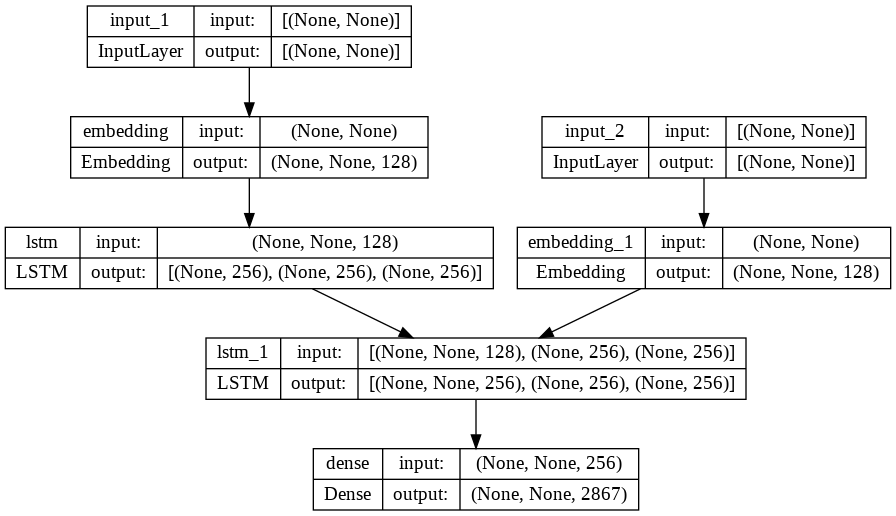

In [ ]:
#schema base model
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

## Model Evaluation

In [ ]:
training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], sample_weight_mode='temporal' )#Training
history1=training_model.fit([Input_encoder_pad, Input_decoder_pad], target, batch_size = batch_size, epochs = epochs, validation_split = 0.2)

Epoch 1/50
37/37 [==============================] - 11s 164ms/step - loss: 1.7063 - accuracy: 0.8598 - val_loss: 0.1941 - val_accuracy: 0.9835
Epoch 2/50
37/37 [==============================] - 4s 114ms/step - loss: 0.8810 - accuracy: 0.8830 - val_loss: 0.1272 - val_accuracy: 0.9835
Epoch 3/50
37/37 [==============================] - 4s 114ms/step - loss: 0.7505 - accuracy: 0.8852 - val_loss: 0.1231 - val_accuracy: 0.9835
Epoch 4/50
37/37 [==============================] - 4s 114ms/step - loss: 0.7358 - accuracy: 0.8867 - val_loss: 0.1186 - val_accuracy: 0.9839
Epoch 5/50
37/37 [==============================] - 4s 113ms/step - loss: 0.7248 - accuracy: 0.8871 - val_loss: 0.1174 - val_accuracy: 0.9844
Epoch 6/50
37/37 [==============================] - 4s 114ms/step - loss: 0.7140 - accuracy: 0.8881 - val_loss: 0.1168 - val_accuracy: 0.9842
Epoch 7/50
37/37 [==============================] - 4s 113ms/step - loss: 0.7009 - accuracy: 0.8887 - val_loss: 0.1177 - val_accuracy: 0.9842
Epoch

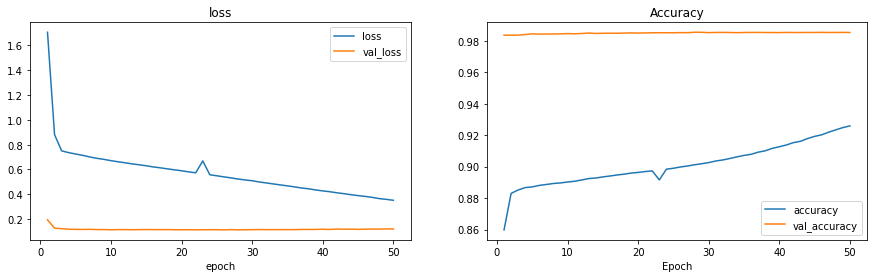

In [ ]:
epochs = 50

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(range(1,epochs+1), history1.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1), history1.history['val_loss'],label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[0].set_xlabel('epoch')

ax[1].plot(range(1,epochs+1), history1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1), history1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
plt.show()

berdasarkan grafik tersebut, architecture base model menghasilkan nilai accuracy yang cukup konsisten pada data validasi dengan akurasi 98.52% dan loss 0.1205. selain itu, model tersebut menghasilkan nilai akurasi yang cendrung naik pada data training dengan puncak akurasi di 92.59% (93%) dan loss 0.3518. nilai loss yang kecil mengindikasi bahwa model tersebut cukup baik dan akurat dalam menjawab pertanyaan yang akan di ajukkan oleh user. hal tersebut mengartikan bahwa model dengan architecture seperti itu dapat digunakan dalam pembuatan chatbot. akan tetapi, nilai loss pada model tersebut dapat dikurangi lagi dan nilai akurasi nya dapat ditingkatkan. selain itu, nilai akurasi yang cukup tinggi pada epoch awal perlu dicurigai. nilai akurasi yang cukup tinggi pada epoch awal dapat mengindikasi dua hal, yaitu model tidak dapat mempelajari data dengan sangat baik atau model tersebut konsisten menghasilkan nilai akurasi tersebut. untuk menghindari model tidak dapat mempelajari data yang akan mengakibatkan model tidak dapat menjawab pertanyaan user dengan benar, perlu dilakukan model improvement untuk menghasilkan nilai akurasi yang tinggi dan cendrung naik pada data validasi. sehingga kemungkinan model untuk salah dalam menjawab pertanyaan user sangat kecil dan user bisa mendapatkan jawaban yang memuaskan dari chatbot tersebut.


# - Model Improvement

menurut sumber https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484, untuk mengatasi hal tersebut diperlukan penambahan activation function seperti 'relu' dan layer batch normalization. oleh karena itu pada model improvement ini dilakukan penambahan layer dense dengan activation function 'relu' dengan jumlah neuron 200 dan layer batch normalization pada architecture model encoder. selain itu, model decoder juga dilakukan penambahan layer dense dengan activation 'relu' dengan jumlah neuron 32  dan layer batch normalization. penambahan layer dense dengan activation function 'relu' dan batch normalization pada encoder dan decoder diharapkan model dapat menghasilkan nilai akurasi yang lebih baik dan beragam dan cendrung naik untuk meminimalisir error atau kesalahan model dalam menjawab pertanyaan user.

penambahan satu layer dense dengan activation function dan satu layer batch normalization dikarenakan jumlah data pada dataset yang digunakan pada kasus ini sangat sedikit sehingga menambahan layer dense dan batch normalization yang lebih dari satu bisa mengakibatkan model tersebut mengalami overfiting, bias, kesulitan dalam mempelajari dataset tersebut, dan exploding gradient. exploding gradient merupakan keadaan dimana nilai akurasi pada model mengalami penurunan dan kenaikkan secara signifikan dalam waktu tertentu. oleh karena itu, pada kasus ini hanya dilakukan satu penambahan layer dense dengan activation 'relu' dan satu layer batch normalization.

## Model Definition

In [ ]:
#Encoder
encoder_inputs1 = Input(shape=(None,))
encoder_embedding1 = Embedding(input_dim=jumlah_kataQ, output_dim=128, embeddings_initializer="uniform", embeddings_regularizer='l2', input_length=max_sen_encoder)(encoder_inputs1)
encoder_layer = LSTM(256,return_sequences=True)(encoder_embedding1)
encoder_layer = Dense(200,activation='relu')(encoder_layer)
encoder_layer = tf.keras.layers.BatchNormalization()(encoder_layer)
encoder_layer = tf.keras.layers.Dropout(0.1)(encoder_layer)
encoder_lstm1 = LSTM(128, return_state=True)
encoder_layer = tf.keras.layers.BatchNormalization()(encoder_layer)
encoder_layer = tf.keras.layers.Dropout(0.1)(encoder_layer)
encoder_outputs1, state_hidden, state_cell = encoder_lstm1(encoder_layer)
encoder_states1 = [state_hidden, state_cell]

#Decoder
decoder_inputs1 = Input(shape=(None, ))
decoder_embedding1 = Embedding(input_dim=jumlah_kataA, output_dim=128, embeddings_initializer="uniform", embeddings_regularizer='l2', input_length=max_sen_decoder)(decoder_inputs1)
decoder_lstm1 = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs1, decoder_state_hidden, decoder_state_cell = decoder_lstm1(decoder_embedding1 , initial_state=encoder_states1)
decoder_BN = tf.keras.layers.BatchNormalization()
decoder_layer = decoder_BN(decoder_outputs1)
decoder_Dense1 = Dense(32, activation='relu')
decoder_layer = decoder_Dense1(decoder_layer)
decoder_Dense2 = Dense(jumlah_kataA, activation='softmax')
decoder_outputs1 = decoder_Dense2(decoder_layer)

## Model Training

In [ ]:
training_model1 = Model([encoder_inputs1, decoder_inputs1], decoder_outputs1) # Compiling

In [ ]:
training_model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 128)    49024       ['input_3[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, None, 256)    394240      ['embedding_2[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, None, 200)    51400       ['lstm_2[0][0]']                 
                                                                                            

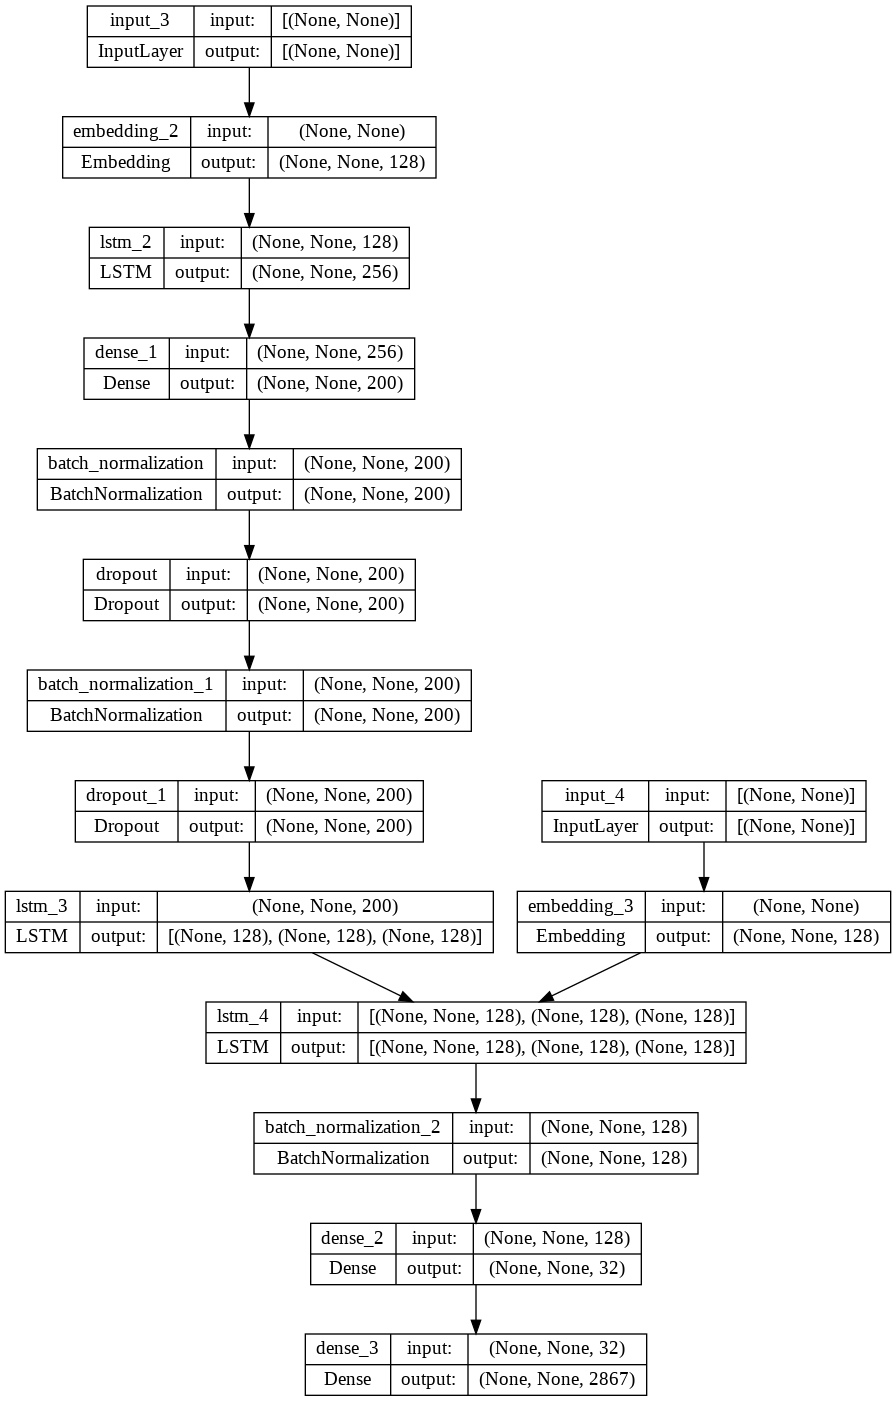

In [ ]:
#Schema architecture model improvement
plot_model(training_model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

## Model Evaluation

In [ ]:
training_model1.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.1), loss='categorical_crossentropy', metrics=['accuracy'])#Training
history2=training_model1.fit([Input_encoder_pad, Input_decoder_pad], target, batch_size = 4, epochs = 50, validation_split = 0.2)

Epoch 1/50
37/37 [==============================] - 12s 173ms/step - loss: 7.9106 - accuracy: 0.8105 - val_loss: 7.5625 - val_accuracy: 4.6352e-04
Epoch 2/50
37/37 [==============================] - 4s 119ms/step - loss: 2.3124 - accuracy: 0.8677 - val_loss: 0.3799 - val_accuracy: 0.9835
Epoch 3/50
37/37 [==============================] - 4s 117ms/step - loss: 0.9107 - accuracy: 0.8831 - val_loss: 0.2711 - val_accuracy: 0.9835
Epoch 4/50
37/37 [==============================] - 4s 118ms/step - loss: 0.8507 - accuracy: 0.8831 - val_loss: 0.2371 - val_accuracy: 0.9835
Epoch 5/50
37/37 [==============================] - 4s 118ms/step - loss: 0.8312 - accuracy: 0.8831 - val_loss: 0.2038 - val_accuracy: 0.9834
Epoch 6/50
37/37 [==============================] - 4s 121ms/step - loss: 0.8207 - accuracy: 0.8832 - val_loss: 0.1873 - val_accuracy: 0.9832
Epoch 7/50
37/37 [==============================] - 4s 118ms/step - loss: 0.7934 - accuracy: 0.8832 - val_loss: 0.1798 - val_accuracy: 0.9834
E

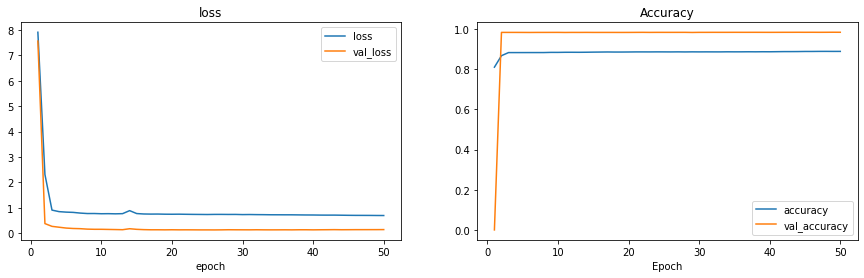

In [ ]:
epochs = 50

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(range(1,epochs+1), history2.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1), history2.history['val_loss'],label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[0].set_xlabel('epoch')

ax[1].plot(range(1,epochs+1), history2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1), history2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
plt.show()

Berdasarkan grafik tersebut terjadi penurunan nilai akurasi dan kenaikkan nilai loss yang cukup signifikan pada model improvement. hal ini berarti architecture pada model pertama merupakan architecture yang terbaik untuk kasus ini. hal ini bisa disebabkan oleh beberapa hal. salah satunya penyebabnya adalah jumlah data yang dimasukkan kedalam model terlalu sedikit sehingga archicture model yang terlalu rumit (terlalu banyak layer) menyebabkan model tersebut mengalami overfitting. selain itu hal tersebut tidak mengartikan bahwa model improvement tidak bekerja dengan baik pada kasus ini akan tetapi jumlah data yang sedikit membuat model improvement tidak dapat bekerja maksimal.

# **6 - Model Inference**

Pada bagian ini digunakan architecture model sebelum improvement untuk menguji model dalam menjawab pertanyaan baru yang akan di berikan user

Berikut architecture model encoder untuk model inference:

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         49024     
                                                                 
 lstm (LSTM)                 [(None, 256),             394240    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 443,264
Trainable params: 443,264
Non-trainable params: 0
_________________________________________________________________


Berikut architecture model decoder untuk model inference:

In [ ]:
decoder_state_input_h = tf.keras.layers.Input(shape=( None ,))
decoder_state_input_c = tf.keras.layers.Input(shape=( None ,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding , initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = tf.keras.models.Model(inputs = [decoder_inputs] + decoder_states_inputs, outputs = [decoder_outputs] + decoder_states)

decoder_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 128)    366976      ['input_2[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None)]       0           []                               
                                                                                            

In [ ]:
encoder_model.trainable = False
decoder_model.trainable = False

In [ ]:
answer_words = dict((v,k) for k,v in decoder_token.word_index.items())

In [ ]:
inf = Encoder_token.texts_to_sequences(["What does it mean to have a mental illness?"])
inf = pad_sequences( inf , maxlen=max_sen_encoder , padding='post' )

state_inf = encoder_model.predict(inf,verbose=0)

sentences = []
target_seq = np.array([[decoder_token.word_index['start']]])
while True:
  dec_out, h, c = decoder_model.predict([target_seq] + state_inf,verbose=0)

  wd_id = np.argmax(dec_out[0][0])+1
  word = answer_words[wd_id]
  sentences.append(word)

  target_seq = np.array([[wd_id]])
  state_inf = [h,c]

  if word == 'end' or len(sentences)>=50:
    break

print(' '.join(sentences))

you is the diabetes catch disorder a access disorder a access so or want and lives and 19 and the variety in can it if or the skills and or experiencing and distress and you be this and at way and making from can making from you use and the


berdasarkan hasil model inference tersebut dapat diartikan bahwa model tersebut tidak dapat digunakan dalam pembuatan chatbot untuk menjawab pertanyaan - pertanyaan masyarakat seputar mental health dan covid-19. hal ini berarti model tersebut belum dapat membedakan setiap pertanyaan dan jawaban pertanyaaan tersebut. walaupun nilai akurasi model cukup tinggi dan nilai lost cukup rendah. akan tetapi perubahan nilai akurasi pada data validasi yang cukup kecil dapat memengaruhi keakurasi dari hasil prediksi model. perubahan yang cukup kecil itu berindikasi bahwa model tidak dapat mempelajari data dengan baik. selain itu, nilai akurasi pada validasi yang sama di beberapa epoch juga menyebabkan model tidak dapat mempelajari data dengan yang berdampak hasil prediksi dari model tersebut tidak akurat.

# **7 - Saving Model**

In [ ]:
encoder_model.save('encoder_model_new1.h5')
decoder_model.save('decoder_model_new1.h5')
pickle.dump(Encoder_token, open('Encoder_token_new1.pkl', 'wb'))
pickle.dump(answer_words, open('answer_words_new1.pkl', 'wb'))


# **8 - Conclusion**

Pada kasus ini, PT INIPEDIA meminta tim data scientist untuk membuat sebuah aplikasi chatbot yang dapat menjawab setiap pertanyaan masyarakat tentang mental health dan covid-19. berdasarkan proses pembuatan model buat chatbot dapat disimpulkan bahwa:
1. **Model yang terbaik pada kasus ini merupakan Base Model**. hal ini dikarenakan jumlah data pada pembuatan model sangat sedikit sehingga model dengan architecture yang sederhana mampu menghasilkan nilai loss yang kecil dan nilai akurasi yang tinggi pada model.
2. nilai loss pada data training di base model 0.3518 dengan akurasi 0.9259 (92.59%)
3. nilai loss pada data validasi di base model 0.1205 dengan akurasi 0.9852 (98.52%)
4. architecture terbaik untuk pembuatan chatbot, yaitu: encoder model (satu input layer, satu layer embedding dengan embedding initializer dan regularizer, satu hidden layer lstm dengan jumlah neuron 256, satu layer ouput dengan activation function softmax), dan decoder model (satu input layer, satu layer embedding dengan embedding initializer dan regularizer, satu hidden layer lstm dengan jumlah neuron 256, dan satu layer output dengan activation function softmax)
5. optimizer yang digunakan pada base model ini rmsprop dengan jumlah epoch 4. 

berdasarkan hasil tersebut dapat disimpulkan bahwa model tersebut didapat digunakan untuk pembuatan chatbot dalam menjawab pertanyaan - pertanyaan user mengenai penyakit/kesehatan.

Berikut rekomendasi yang dapat saya berikan untuk kasus ini:
1. jika datanya sangat sedikit tidak disarankan untuk mengunakan model deep learning dalam pembuatan model chatbot.
2. jika ingin tetap mengunakan model deep learning disarankan untuk membuat architecture model sesederhana mungkin dengan jumlah epoch sekecil mungkin. jika jumlah epochnya besar maka model akan kecepatan mempelajari data training sehingga menghasilkan nilai akurasi yang tetap pada data validasi (vanishing gradient)
3. jika ingin tetap mengunakan model deep learning disarankan untuk membuat dictionary antara pertanyaan dengan jawaban pertanyaan untuk meminimalisir kesalahan atau jawaban yang tidak sesuai dengan pertanyaan user.
4. tidak mengunakan learning rate. jika mengalami exploding gradient disarankan untuk memakai clip value dan optimizer adam.
5. tidak disarankan mengunakan dropout dan disarankan mengunakan layer batch normalization dengan jumlah yang wajar.
6. mengunakan batch size sekecil mungkin